# NE 630 - Lesson 19

In this tutorial, explore how to use the `LWRUnitCell` and `SFRUnitCell` to explore and optimize the design of a unit cell given some objective and constraints.

For next time, read 9.1-9.4.


# In-Class Exercise - Target SFR Pu Fraction

For last week's homework, you solved 4.4 in the book, which asked you to find the PuO$_2$ fraction that yielded $k = 1$ given a non-leakage probability of 0.9.  In other words, you needed to find the fraction that produces $k_{\infty}$ such that

$$
  k = 1 = P_{NL}k_{\infty} = 0.9 k_{\infty} \longrightarrow k_{\infty} \approx 1.11 \, .
$$

Our goal is to use `SFRUnitCell` to model the system and to graphical and numerical tools to determine the answer.  For simplicity, we will assume 10% enrichment of the uranium.

### Step 1 - Define the geometry.

The SFR under consideration has 30% fuel, 50% coolant, and 20% structural/cladding by volume.  For a fixed fuel radius of 0.4 cm, what must the cladding radius be?  The pitch?

$$
  \frac{V_f}{V_{s}} = \frac{\pi r_f^2}{\pi (r_{s}^2 - r_f^2)} = \frac{30}{20} 
   \qquad \text{and} \qquad
  \frac{V_{f}+V_{s}}{V_{c}} = \frac{\pi r_{s}^2}{3\sqrt{3}s^2/2 - \pi r_{s}^2} = 1 \, .
$$

(where the side length is $s = P / \sqrt{3}$, and $P$ is the pitch)

In [33]:
import numpy as np

r_f = 0.4
r_s = np.sqrt(r_f**2 * 5/3)
s = np.sqrt(2*np.pi*r_s**2/(3*np.sqrt(3)/2))
p = np.sqrt(3)*s
print("r_s = {:.4f} cm  and p = {:.4f} cm".format(r_s, p))

r_s = 0.5164 cm  and p = 1.3909 cm


### Step 2 - Set Up The Model

In [38]:
import sys
sys.path.append("unitcell") 
from unitcell_utils import *

import warnings                    # THIS IS GENERALLY NOT RECOMMNENDED
warnings.filterwarnings("ignore")  # BUT NOBODY WILL DIE....

In [40]:
# Sanity check -- our the volumes right?
sfr = SFRUnitCell(fuel_radius=r_f, clad_radius=r_s, pitch=p, enrichment=10, pu_fraction=0)
sfr.volume["fuel"] / sfr.cell_volume, sfr.volume["clad"] / sfr.cell_volume, sfr.volume["cool"] / sfr.cell_volume

(0.2999999999999999, 0.19999999999999996, 0.5000000000000002)

### Step 3 - Parameterize the Model

In [44]:
def compute_k_oo(f):
    sfr = SFRUnitCell(fuel_radius=r_f, clad_radius=r_s, pitch=p, enrichment=10, pu_fraction=f)
    sfr.run()
    νΣf_f = sfr.nuSigmaF['fuel'][0] # there is only 1 group!
    Σa_f = sfr.SigmaA['fuel'][0]
    Σa_s = sfr.SigmaA['clad'][0]
    Σa_c = sfr.SigmaA['cool'][0]
    V_f = sfr.volume['fuel']
    V_s = sfr.volume['clad']
    V_c = sfr.volume['cool']
    k_oo = V_f*νΣf_f / (V_f*Σa_f + V_s*Σa_s + V_c*Σa_c)  # Eq. (4.8)
    return k_oo

In [48]:
fractions = np.array([0,0.05, 0.1, 0.15, 0.2])
k_oo = 0*fractions
for i in range(len(fractions)):
    k_oo[i] = run_sfr(fractions[i])

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading O16 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/O16.h5
 Reading O17 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/O17.h5
 Reading Pu239 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Pu239.h5
 Reading Na23 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Na23.h5
 Reading C0 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/C0.h5
 Reading Ti46 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Ti46.h5
 Reading Ti47 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Ti47.h5
 Reading Ti48 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Ti48.h5
 Reading Ti49 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Ti49.h5
 Reading Ti50 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Ti50.h5
 Reading Cr50 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Cr50.h5
 Reading Cr52 from
 /home/r

 Reading Fe54 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Fe54.h5
 Reading Fe56 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Fe56.h5
 Reading Fe57 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Fe57.h5
 Reading Fe58 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Fe58.h5
 Reading Ni58 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Ni58.h5
 Reading Ni60 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Ni60.h5
 Reading Ni61 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Ni61.h5
 Reading Ni62 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Ni62.h5
 Reading Ni64 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Ni64.h5
 Reading Mn55 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Mn55.h5
 Reading P31 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/P31.h5
 Reading Al27 from
 /ho

 Reading Cu65 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Cu65.h5
 Reading Y89 from
 /home/robertsj/Research/openmc_data/endfb-vii.1-hdf5/neutron/Y89.h5
 Minimum neutron data temperature: 600 K
 Maximum neutron data temperature: 1200 K
 Reading tallies XML file...
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for U235
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.56215
        2/1    1.55179
        3/1    1.55270
        4/1    1.56634
        5/1    1.56751
        6/1    1.55803
        7/1    1.55367    1.55585 +/- 0.00218
        8/1    1.56064    1.55745 +/- 0.00203
        9/1    1.55072    1.55577 +/- 0.00221
       10/1    1.55520    1.55565 +/- 0.00172
 Creating state point statepoint.10.h5..

### Step 4 - Visualize the Results

Text(0, 0.5, '$k_{\\infty}$')

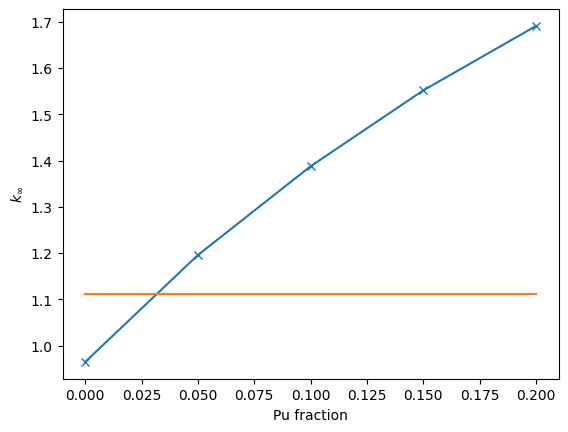

In [52]:
plt.plot(fractions, k_oo, '-x')
plt.plot(fractions, 1.1111+0*k_oo)
plt.xlabel('Pu fraction')
plt.ylabel('$k_{\infty}$')

### Step 5 - Apply Numerical Methods

Ultimately, what we have is the following problem: find $f$ such that $k_{\infty}(f) = 1.1111$.  Alternatively, define

$$
   g(f) = k_{\infty}(f) - 1.1111 = 0 \, .
$$

Then, we're seeking $f$ that makes $g(f) = 0$, i.e., we want the **root** of $g(f)$.  

Options (beyond graphing) include **bisection** and **Newton's method** (see [this Wiki article](https://en.wikipedia.org/wiki/Root-finding_algorithms)).  

**Caution**:  the uncertainty in $k_{\infty}$ as computed by OpenMC may makes finding a root with arbitrary precision practically impossible!  However, we can first fit the data and then apply the method!

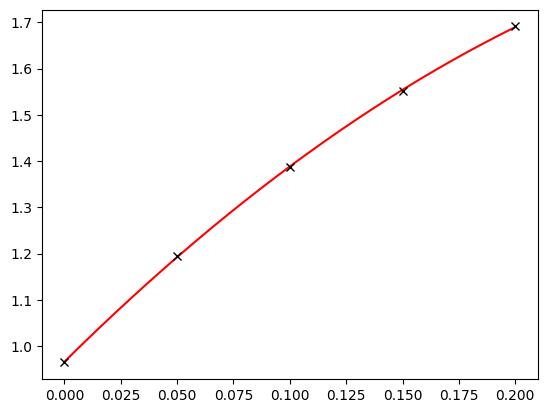

In [61]:
k_oo_fit = lambda f: np.polyval(np.polyfit(fractions, k_oo, 2), f)

ff = np.linspace(0, 0.2, 1000)

plt.plot(ff, k_oo_fit(ff), 'r')
plt.plot(fractions, k_oo, 'kx')

In [58]:
g = lambda f: np.polyval(np.polyfit(fractions, k_oo, 2), f) - 1.1111

# For the Homework

(Similar to 4.10) Use `LWRUnitCell` with the default fuel and cladding radii and enrichment.  Then, 
determine the P/D ratios that represent $V_{nf}/V_{f} = 0.5$ and $V_{nf}/V_{f} = 2.5$.  For P/D 
values between those extremes, use `LWRUnitCell` to compute and plot 
the four factors and $k_{\infty}$.

$$
  \eta_T = \frac{\nu\bar{\Sigma}_{fT}^f} {\bar{\Sigma}^f_{aT}} 
  \qquad \text{reproduction factor}
  \tag{4.49*}
$$

$$
 f = \frac{1}{1 + \zeta \left(V_{nf} \bar{\Sigma}^{nf}_{aT} \big/ V_f \bar{\Sigma}^f_{aT} \right ) } 
 \qquad \text{thermal utilization}
 \tag{4.48*}
$$

$$
 p = 1 - \frac{V_f \bar{\Sigma}^f_{aF} \phi^{f}_{F}}
   {V_f \left[ \bar{\Sigma}^f_{aT} \phi^{f}_{T} + \bar{\Sigma}^f_{aF} \phi^{f}_{F} \right ]+ V_{nf} \bar{\Sigma}^{nf}_{aT} \phi^{nf}_{T}} 
 \qquad \text{resonance escape probability}
 \tag{4.28*}
$$

$$
\varepsilon = \frac{\nu\bar{\Sigma}^f_{fT} \phi^{f}_{T} + \nu\bar{\Sigma}^f_{fF} \phi^{f}_{F} }
   {\nu\bar{\Sigma}^f_{fF} \phi^{f}_{F} } 
 \qquad \text{fast fission factor}
\tag{4.25*}
$$
